In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = 1

class Planet():
    def __init__(self,mass,pos,v=[0,0]): #pos is a tuple (x,y), velocity is a tuple
        self.mass = mass
        self.pos = np.array(pos,dtype=float)
        self.v = np.array(v,dtype=float)
    
def gravity(planet1,planet2):
    
    d = planet2.pos - planet1.pos #displacement vector
    r = np.linalg.norm(d) 
    magnitude = (G*planet1.mass*planet2.mass)/r**2
    
    FGVector = magnitude * d/r #magnitude in the unit direction of r, r/|r|
    
    a1 = FGVector/planet1.mass
    a2 = -FGVector/planet2.mass #N3L
        
    return a1,a2 #returns tuple of acceleration 1.

def setup(planetList):
    plt.figure(figsize=(7,7))
    axs = plt.axes()
    axs.set_facecolor('black')
    for planet in planetList:
        plt.scatter(planet.pos[0],planet.pos[1])
    plt.show()
    
def step(planet1,planet2,dt): #euler
    a1,a2 = gravity(planet1,planet2) 
    
    planet1.v += a1*dt
    planet1.pos += planet1.v*dt
    
    planet2.v += a2*dt
    planet2.pos += planet2.v*dt
    
    
    plt.figure(figsize=(7,7))
    axs = plt.axes()
    axs.set_facecolor('black')
    plt.scatter(planet1.pos[0],planet1.pos[1],c='r')
    plt.scatter(planet2.pos[0],planet2.pos[1],c='b')
    plt.ylim((0,11))
    plt.xlim((0,11))

In [3]:
mars = Planet(100,(1,1))
earth = Planet(200,(10,10))

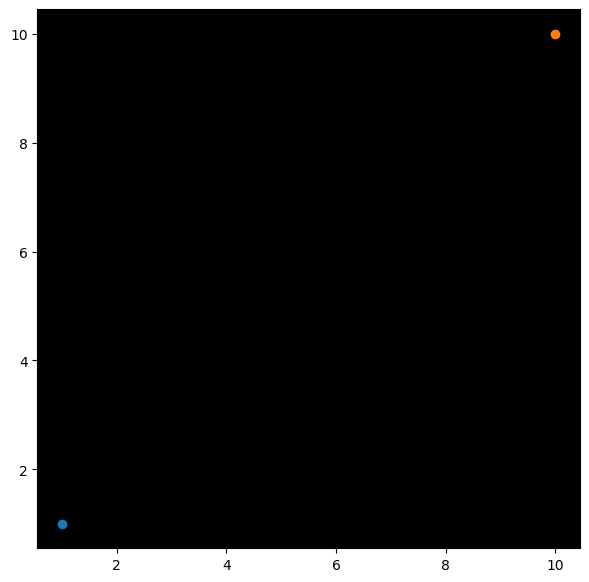

In [4]:
setup([mars,earth])


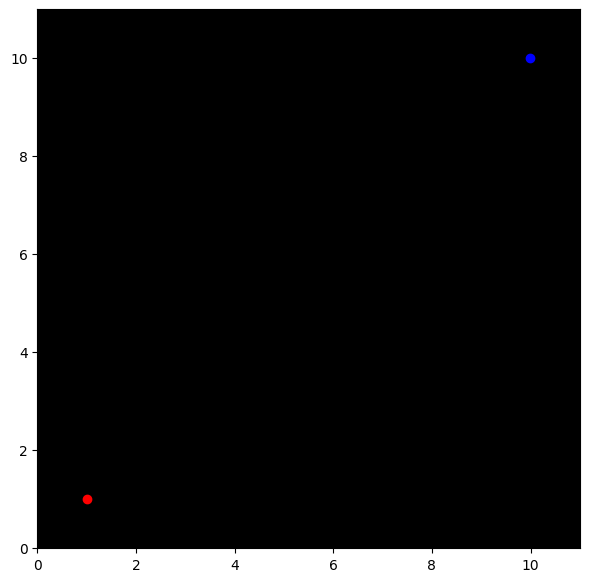

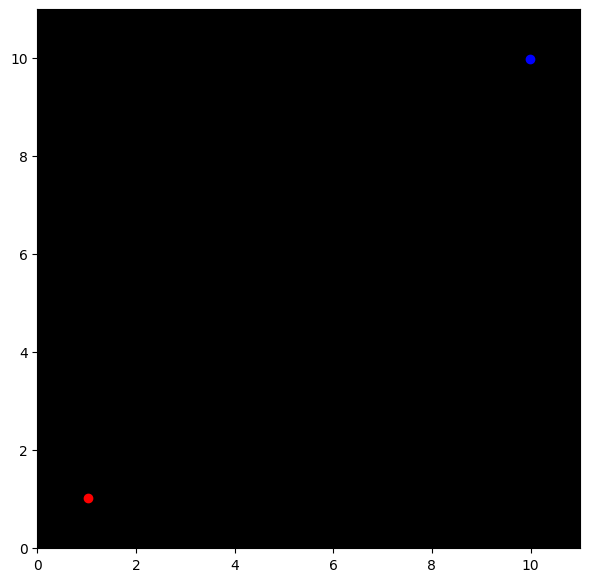

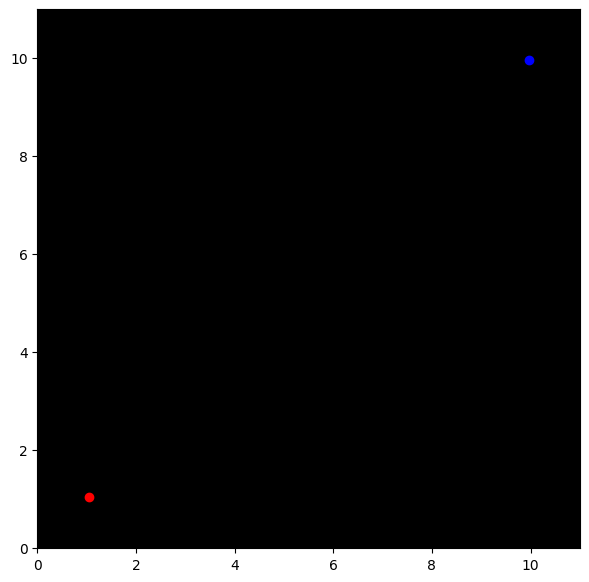

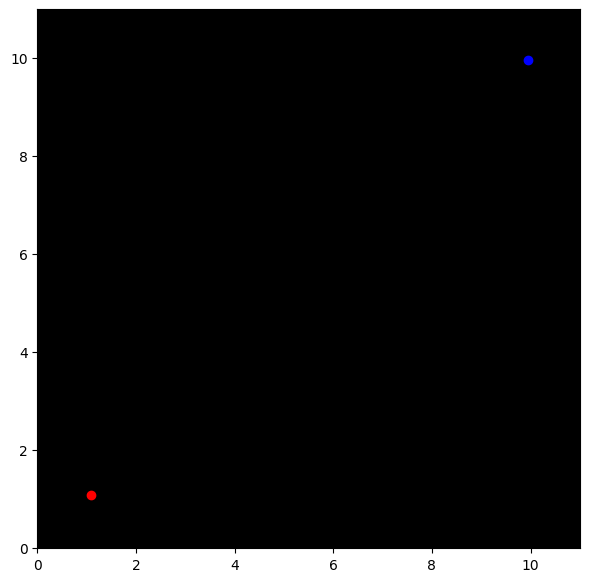

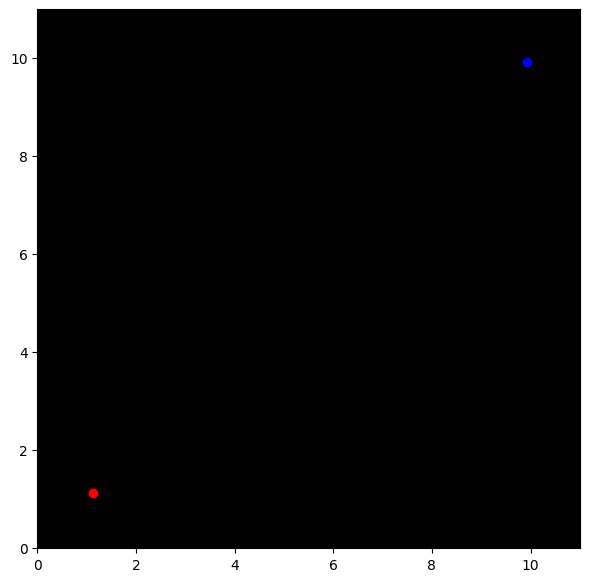

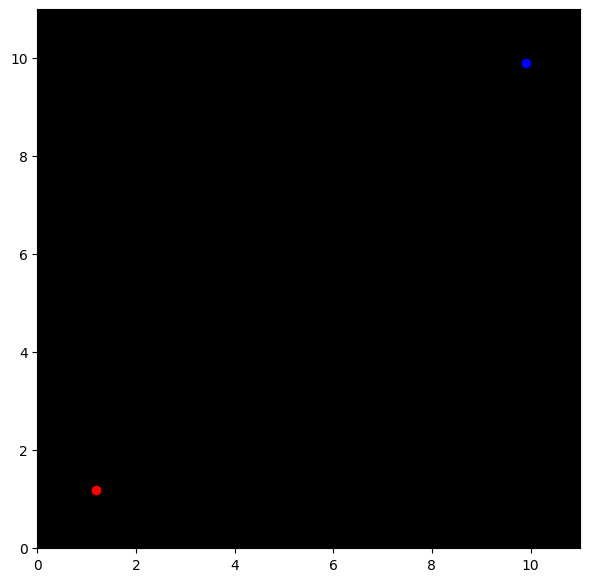

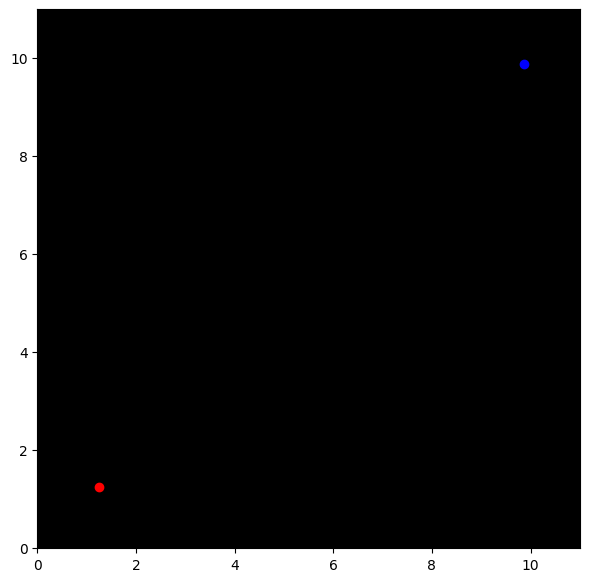

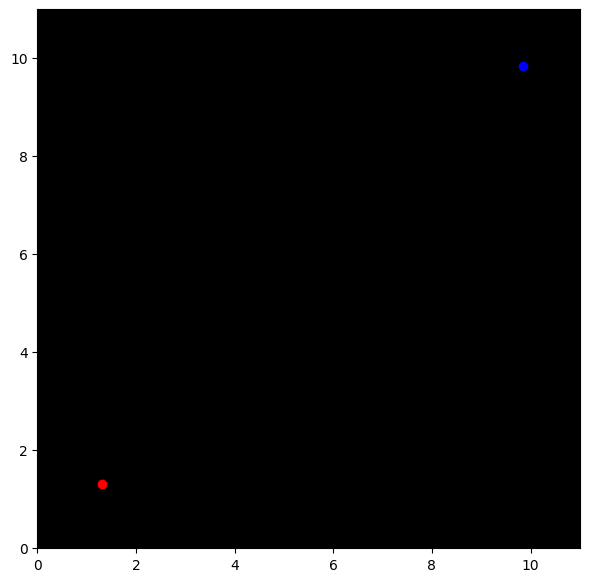

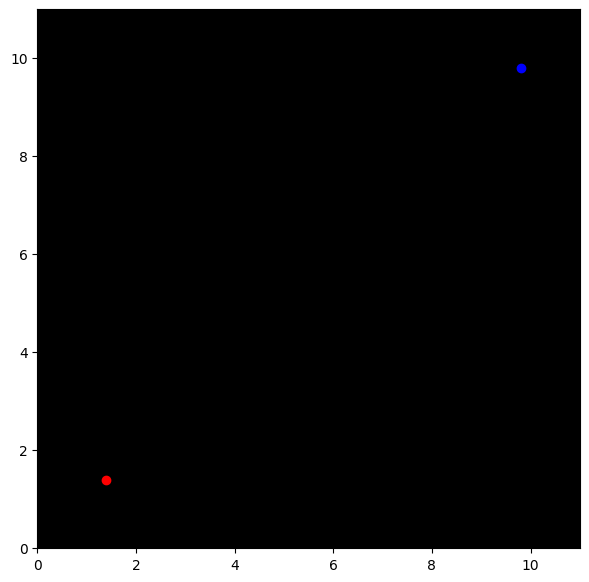

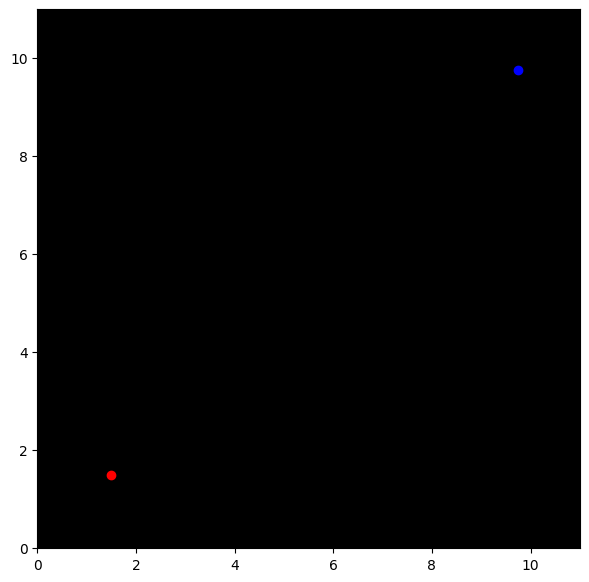

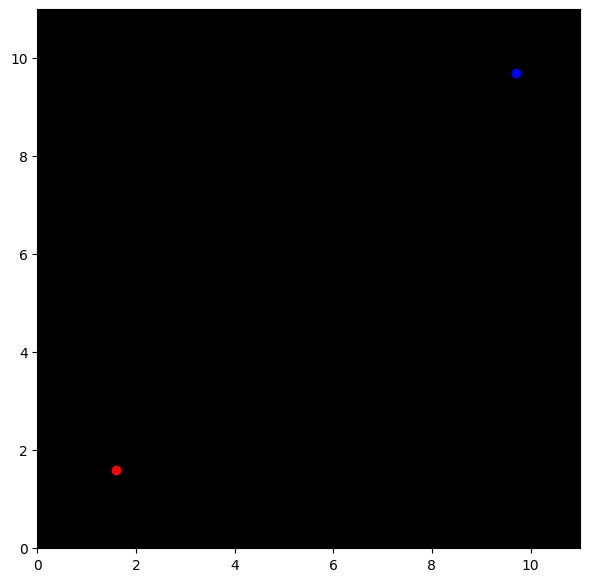

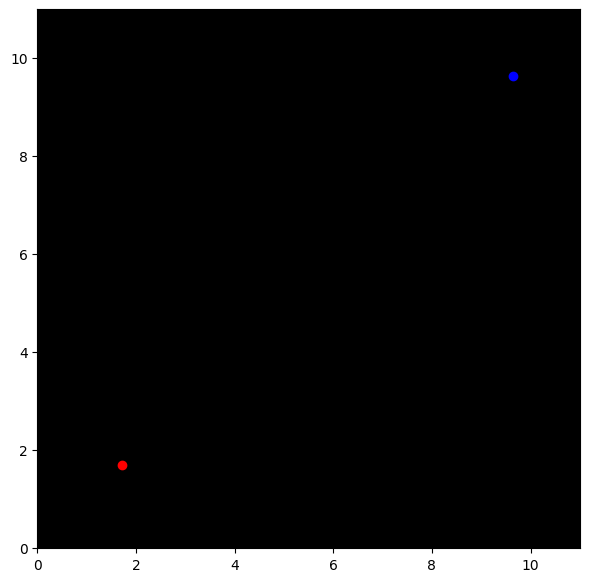

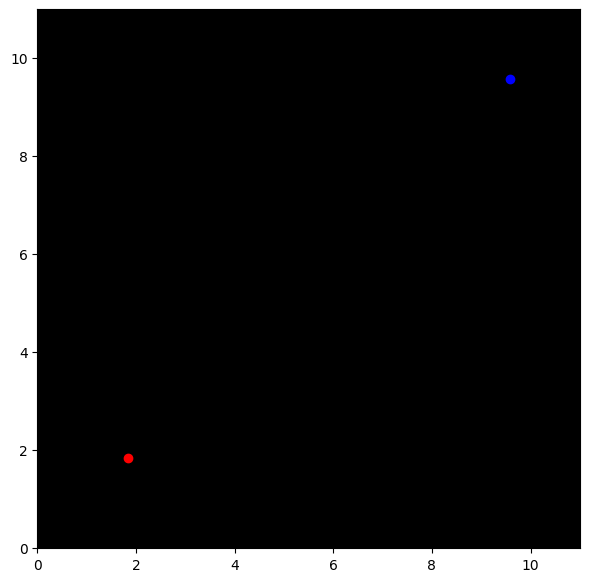

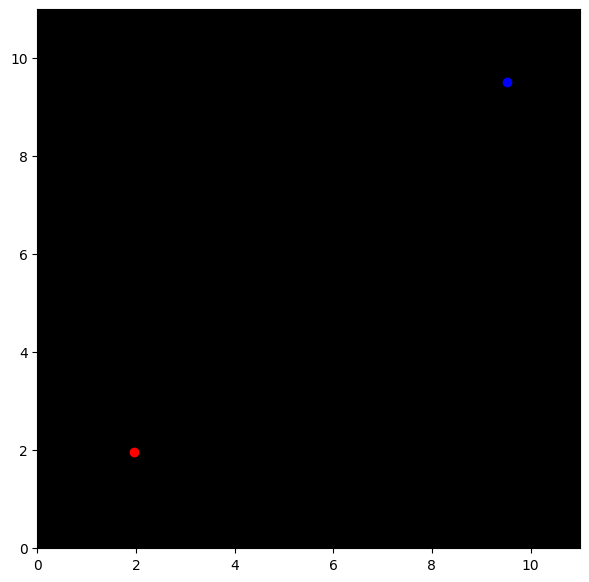

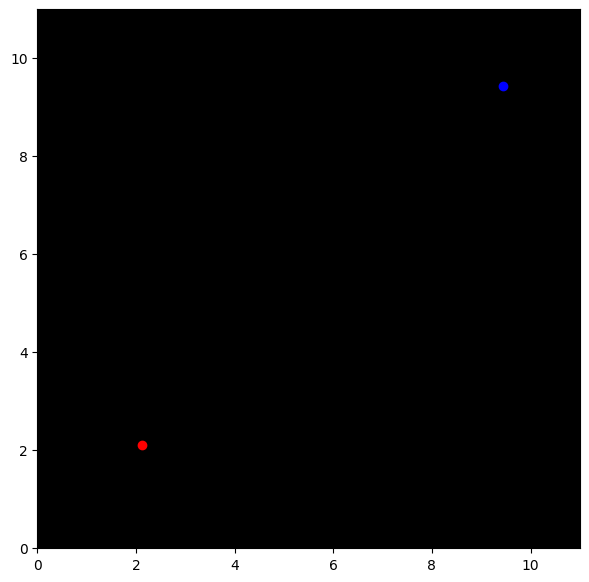

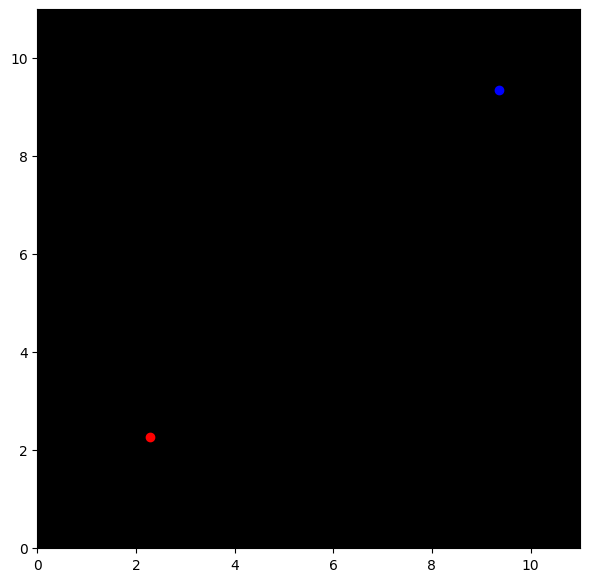

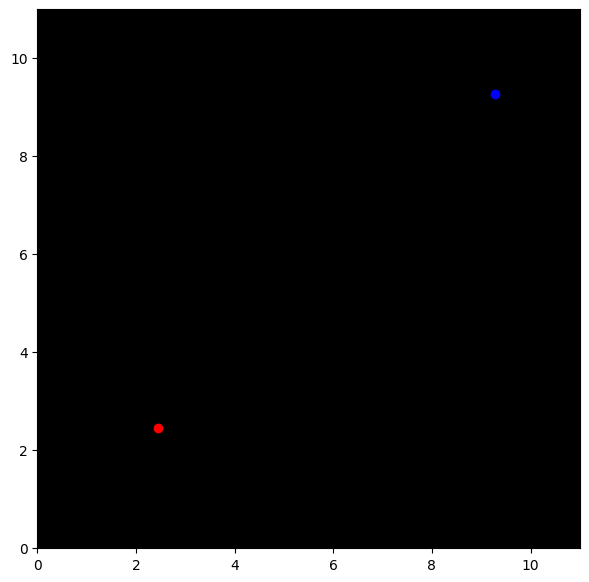

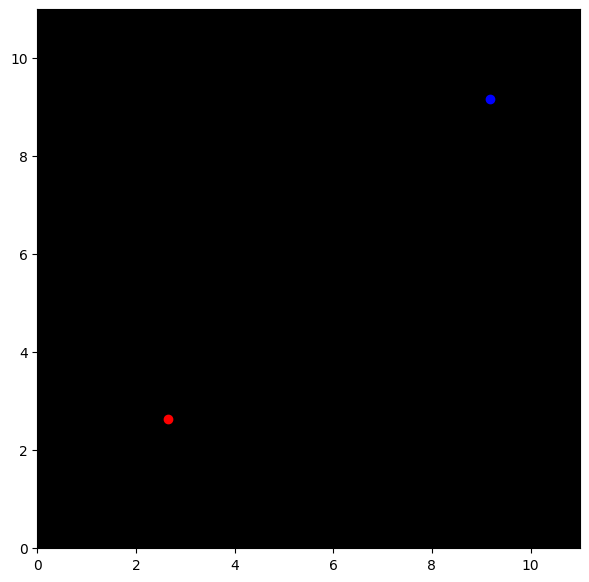

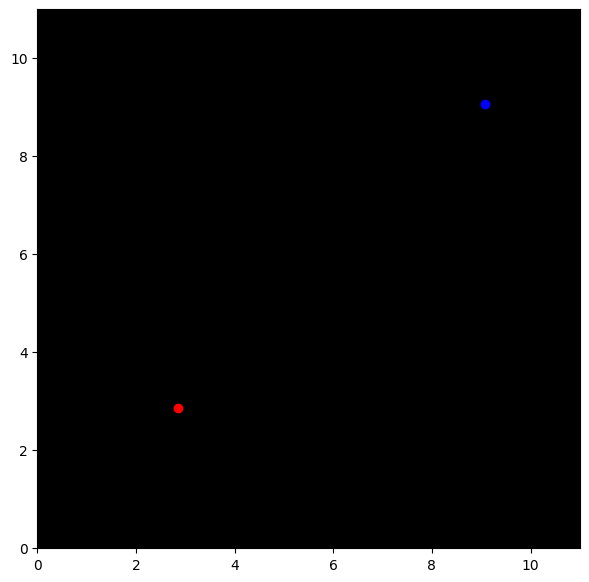

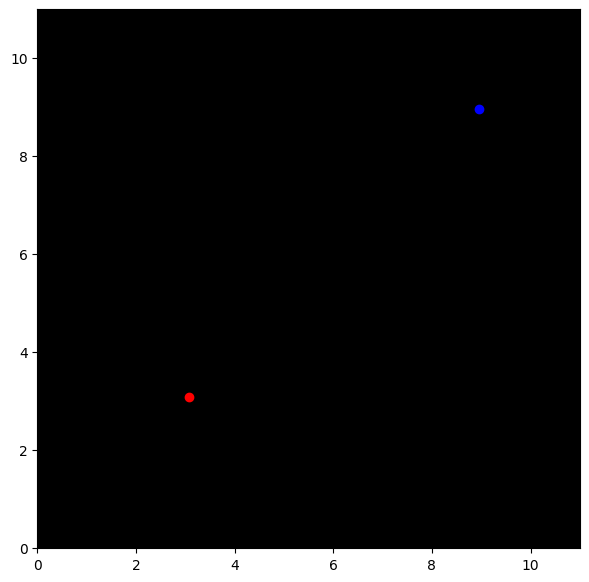

In [5]:
dt = 0.1
for _ in range(20):
    step(mars,earth,dt)